# QC-Database

### Introduction:
This is a project that is being done as a part of a summer internship at Brown University in the Data Analytics department.

# ReadMe QC-Database 

Title: QC Database Prototype
Contributors: August Guang, Ashok Ragavendran, and Gail Golomb Mello
Description: The QCDatabase would form part of the QCKit suite. One component of the QCKit suite is quality control tools to run on Next Generation Sequencing (and perhaps Third Generation Sequencing) data. Another component is visualization of the results of the quality control tools. The final component is the QC Database, containing quality control results from public repositories such as NCBI, such that the results of the quality control tools can be compared and visualized against other similar sequencing runs. This allows the researcher to get a quantitative sense of the quality of their sequences, rather than relying on the researcher’s experiential knowledge about what constitutes high quality sequences or not for their particular organism or protocol. Users running the QCKit suite will also have the option to upload their quality control results into the database as another data point. The entire suite will be incorporated into bioflows, a bioinformatics workflow management tool, which will run quality control at all appropriate intervals, ideally each component of a workflow.

SRA_DB.py SRA_DB.py Description: This python version 2.7 file takes in arguments of taxon_id (species), library_source (sequence type (genomic, etc.), instrument_model (sequencing machine used to perform analysis), and the number of results wanted to be returned. This query returns the run accession numbers(s) from the SRA database query using sqlite3.

License: Licensed under GNU GPLv3 (LICENSE)

# SRA_DB.py :
#### This python 2.7 file takes in search terms as arguments and then returns the corresponding run accesssion numbers.

In [4]:

import argparse
#parser = argparse.ArgumentParser()
import sqlite3
conn = sqlite3.connect ('SRAmetadb.sqlite')
c = conn.cursor()
import shlex


#this function is to query the SRA database to determine the run_accession # for a given
# input of taxon_id, library_source, instrument_model, and number_results
# output run accession #'s
def search_db(search_terms):
        # input...
    taxon_id = search_terms[0]  #integer # which references a taxon ex. homo sapiens has its own #
    library_source = search_terms[1] # ex. transcriptomic RNA, genomic DNA
    instrument_model = search_terms[2] # model of instrument used to perform analysis
    number_results = search_terms[3] # number of results wanted for search
         #sqlite3 query to find run accesions
    c.execute('SELECT run_accession FROM sra WHERE taxon_id == "{0}" AND library_source == "{1}" AND instrument_model == "{2}" LIMIT "{3}";'
    .format(taxon_id, library_source, instrument_model, number_results))
    return c.fetchall()


# arg function to define arguments and add "help" comment
# output is a return of search terms
def search_terms ():
    parser = argparse.ArgumentParser()

#search term arguments
    parser.add_argument('taxon_id', help= 'taxon id number will be an integer number referring to a species')
    parser.add_argument('library_source', help= 'library source is either genomic or transcriptomic')
    parser.add_argument('instrument_model', help= 'model name of instrument used')
    parser.add_argument('number_results', help= 'number of total results to be displayed for search')


    args = parser.parse_args(shlex.split("645657 GENOMIC 'Illumina Genome Analyzer II' 4"))

    search_terms = [args.taxon_id, args.library_source, args.instrument_model, args.number_results]
    search_terms[0] # gives you args.taxon_id
    search_terms[1] # gives you args.library_source
    search_terms[2]# gives you args.instrument_model
    search_terms[3]# gives you args.number_results

    return search_terms


# main function to call results of search_terms, search_db
# output to print the run accession #'s that results from the SLQ query of the SRA database
def main ():
    results = search_terms()
    print(results)
    run_accession = search_db(results)
    print run_accession


# calling the main function
main()

['645657', 'GENOMIC', 'Illumina Genome Analyzer II', '4']


OperationalError: no such table: sra

In [12]:
import argparse
parser = argparse.ArgumentParser()
import sqlite3
conn = sqlite3.connect ('SRAmetadb.sqlite')
c = conn.cursor()
import shlex


def search_terms():
    taxon_id = raw_input("Enter taxon_id: ")

    library_source = str(raw_input("Enter library_source: "))

    instrument_model = raw_input("Enter instrument_model: ")

    number_results = raw_input("Enter number number_results: ")

def  search_db():
    ('SELECT run_accession FROM sra WHERE taxon_id == "{0}" AND library_source == "{1}" AND instrument_model == "{2}" LIMIT "{3}";'
    .format(taxon_id, library_source, instrument_model, number_results))

def main (search_terms, search_db):
    parser.add_argument('taxon_id', help= 'taxon id number will be an integer number referring to a species')
    parser.add_argument('library_source', help= 'library source is either genomic or transcriptomic')
    parser.add_argument('instrument_model', help= 'model name of instrument used')
    parser.add_argument('number_results', help= 'number of total results to be displayed for search')

    args = parser.parse_args(shlex.split("645657 GENOMIC 'Illumina Genome Analyzer II' 4"))
    search_terms = ([args.taxon_id, args.library_source, args.instrument_model, args.number_results])

    return search_terms

main(search_terms, search_db)

['645657', 'GENOMIC', 'Illumina Genome Analyzer II', '4']

# check_runs.py
#### This Python 2.7 file uses SQLite3 to query the SRA database to return the number of single runs and multiple runs for the experiment, the study, and the submission. 

In [3]:
import sqlite3
conn = sqlite3.connect ('SRAmetadb.sqlite')
c = conn.cursor()

        #experiment_ID:
        #How many experiments are there with single runs? 3471647
c.execute('SELECT experiment_ID, COUNT(*) AS RecordCount FROM sra GROUP BY experiment_ID HAVING COUNT(*)==1;')
print len(c.fetchall())
    #How many experiments are there with multiple runs? 164200
c.execute('SELECT experiment_ID, COUNT(*) AS RecordCount FROM sra GROUP BY experiment_ID HAVING COUNT(*)>1;')
print len(c.fetchall())


    #study_ID:
    #How many studies are there with single experiments? 36530
c.execute('SELECT study_ID, COUNT(*) AS RecordCount FROM sra GROUP BY study_ID HAVING COUNT(*)==1;')
print len(c.fetchall())
    # How many studies are there with multiple experiments? 76453
c.execute('SELECT study_ID, COUNT(*) AS RecordCount FROM sra GROUP BY study_ID HAVING COUNT(*)>1;')
print len(c.fetchall())


    #submission_ID:
    #How many studies are there with single submissions?  311564
c.execute('SELECT submission_ID, COUNT(*) AS RecordCount FROM sra GROUP BY submission_ID HAVING COUNT(*)==1;')
print len(c.fetchall())
    # How many submissions are there with multiple submissions? 89892
c.execute('SELECT submission_ID, COUNT(*) AS RecordCount FROM sra GROUP BY submission_ID HAVING COUNT(*)>1;')
print len(c.fetchall())


##output of program:
#3471647
#164200
#36530
#76453
#311564
#89892

OperationalError: no such table: sra

# distribution1.py 
#### This Python 2.7 file generates histograms of the check_runs.py file.  This program returns a graph for single runs verses multiple runs for the experiment, study, and submission IDs. 

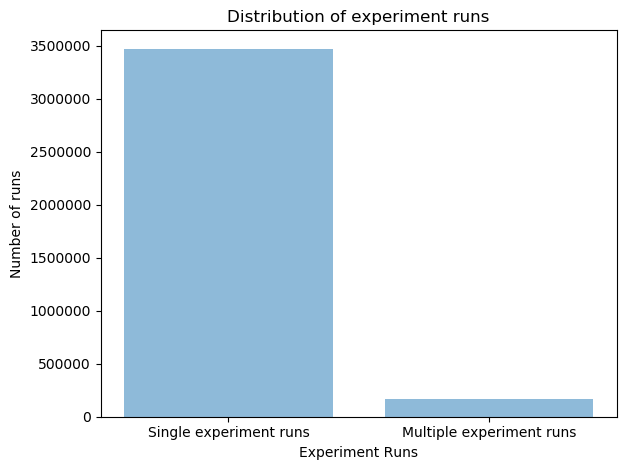

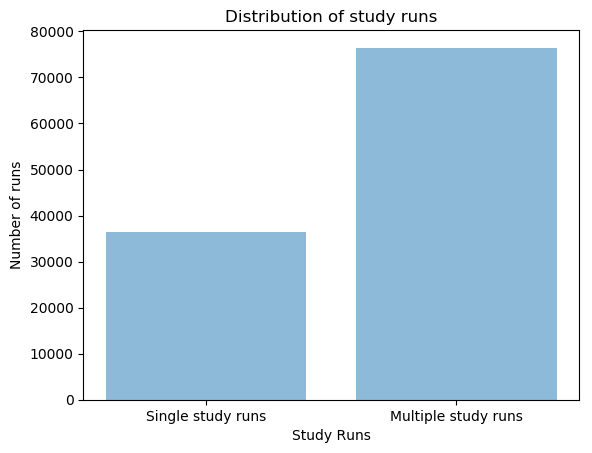

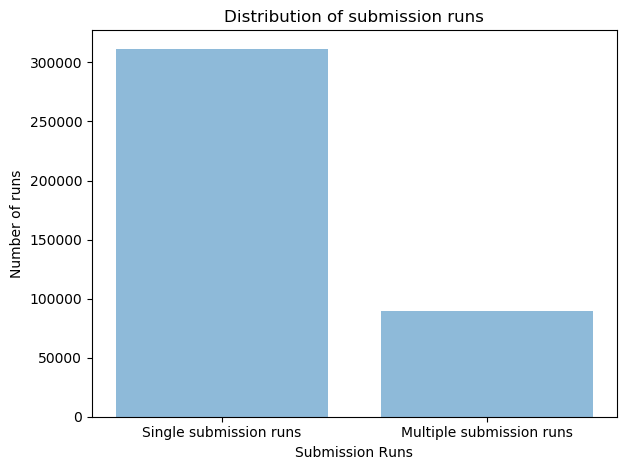

In [2]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt



#experiment_ID distribution chart
objects = ('Single experiment runs', 'Multiple experiment runs')
y_pos = np.arange(len(objects))
num_runs = [3471647, 164200]

plt.bar(y_pos, num_runs, align='center', alpha=0.50)
plt.xticks(y_pos, objects)
plt.xlabel('Experiment Runs')
plt.ylabel('Number of runs')
plt.title('Distribution of experiment runs')
plt.tight_layout()
plt.show()

#study_ID distribution chart
objects = ('Single study runs', 'Multiple study runs')
y_pos = np.arange(len(objects))
num_runs = [36530, 76453]

plt.bar(y_pos, num_runs, align='center', alpha=0.50)
plt.xticks(y_pos, objects)
plt.xlabel('Study Runs')
plt.ylabel('Number of runs')
plt.title('Distribution of study runs')
plt.show()

objects = ('Single submission runs', 'Multiple submission runs')
y_pos = np.arange(len(objects))
num_runs = [311564, 89892]

plt.bar(y_pos, num_runs, align='center', alpha=0.50)
plt.xticks(y_pos, objects)
plt.xlabel('Submission Runs')
plt.ylabel('Number of runs')###########################
plt.title('Distribution of submission runs')
plt.tight_layout()
plt.show()




#single runs:
#exp      study  submission
#3471647 #36530  #311564
#multiples runs:
#164200 #76453 #89892